In [1]:
import numpy as np
from matplotlib import pyplot as plt
import qutip

In [2]:
def tp(x, y):
    return qutip.tensor(x, y)

# Operators.
σx = qutip.Qobj([[0,1],[1,0]])
σy = qutip.Qobj([[0,-1j],[1j,0]])
σz = qutip.Qobj([[1,0],[0,-1]])
ide = qutip.Qobj(np.eye(2))
σp = (σx + 1j * σy)/2
σm = σp.dag()

# Model parameters.
ωA = 1.
ωB = 1.
ΩA = 0.
ΩB = 1.
γ = 0.1
g = 0.1

# Simulation parameters.
number_trajectories = 1000
dt = 0.005
t_final = 50

H = ωA * tp(σz, ide) + ωB * tp(ide, σz) + ΩA * tp(σx, ide) + ΩB * tp(ide, σx) + g * (tp(σp, σm) + tp(σm, σp))

M = np.sqrt(γ) * tp(ide, σm)
M_l = [M]

num_op_B = qutip.Qobj([[0,0],[0,1]])
num_op_B_overall = tp(ide, num_op_B)

ψ0 = tp(qutip.Qobj([[1],[0]]), qutip.Qobj([[1],[0]]))

t_range = np.arange(0, t_final, dt)

In [3]:
result = qutip.ssesolve(H, ψ0, t_range, M_l, [num_op_B_overall], ntraj=number_trajectories)

10.0%. Run time:   6.08s. Est. time left: 00:00:00:54
20.0%. Run time:  12.10s. Est. time left: 00:00:00:48
30.0%. Run time:  18.22s. Est. time left: 00:00:00:42
40.0%. Run time:  24.69s. Est. time left: 00:00:00:37
50.0%. Run time:  30.83s. Est. time left: 00:00:00:30
60.0%. Run time:  36.86s. Est. time left: 00:00:00:24
70.0%. Run time:  42.95s. Est. time left: 00:00:00:18
80.0%. Run time:  49.06s. Est. time left: 00:00:00:12
90.0%. Run time:  55.30s. Est. time left: 00:00:00:06
Total run time:  61.52s


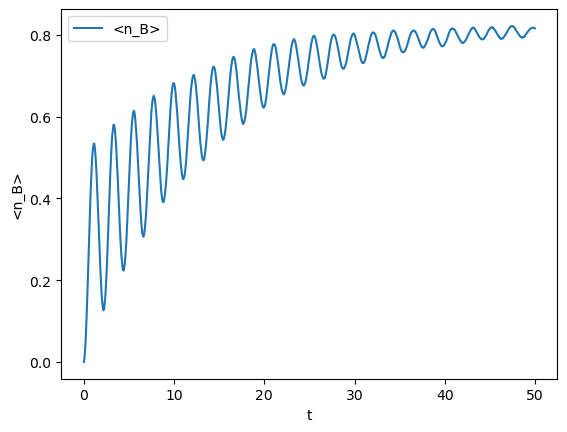

In [5]:
exp_vals = result.expect[0]
plt.plot(t_range, exp_vals, label="<n_B>")
plt.xlabel("t")
plt.ylabel("<n_B>")
plt.legend()
plt.show()